In [1]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_col = df_train.columns.to_list()
test_col = df_test.columns.to_list()

In [6]:
real_col = list(set(train_col) & set(test_col))

In [7]:
real_col.remove('Id')

In [8]:
train_rc=[*real_col,'SalePrice']

In [9]:
str(train_rc) 

"['LowQualFinSF', 'GarageFinish', 'YrSold', 'Foundation', '3SsnPorch', 'Street', 'TotRmsAbvGrd', 'GarageCars', 'OverallCond', 'OpenPorchSF', 'PoolQC', 'HeatingQC', 'LandSlope', 'BsmtFullBath', 'LotFrontage', 'GarageArea', '2ndFlrSF', 'GarageCond', 'Neighborhood', 'WoodDeckSF', 'PoolArea', 'RoofStyle', 'EnclosedPorch', 'Utilities', '1stFlrSF', 'GarageYrBlt', 'LandContour', 'MSZoning', 'MiscFeature', 'KitchenQual', 'MoSold', 'Functional', 'Fence', 'BsmtQual', 'HalfBath', 'GarageQual', 'FireplaceQu', 'BldgType', 'BsmtExposure', 'MiscVal', 'Exterior1st', 'BsmtFinType1', 'BsmtFinSF1', 'MSSubClass', 'MasVnrArea', 'LotArea', 'TotalBsmtSF', 'Condition2', 'SaleCondition', 'BsmtFinSF2', 'LotConfig', 'ScreenPorch', 'PavedDrive', 'Condition1', 'YearBuilt', 'LotShape', 'MasVnrType', 'Alley', 'CentralAir', 'BsmtUnfSF', 'FullBath', 'Fireplaces', 'SaleType', 'Exterior2nd', 'KitchenAbvGr', 'BsmtHalfBath', 'BsmtCond', 'ExterCond', 'BedroomAbvGr', 'GarageType', 'Heating', 'YearRemodAdd', 'Electrical', 'B

In [10]:
df_train = df_train[train_rc]
df_test = df_test[real_col]

In [11]:
def checkna(df):
    colna = pd.DataFrame()
    for i in df.columns.to_list():
        sum = df[i].isnull().sum()
        if(sum>0):
            colna=colna.append({"columns":i,"missing":sum},ignore_index=True)
    return colna

def drop_missing(df,colname):
    try :
        del df[colname]
        return df
    except :
        return df
        

In [12]:
nadf = checkna(df_train)

In [13]:
for i in range(len(nadf)):
    if nadf.loc[i]['missing'] > 50:
       df_train = drop_missing(df_train,nadf.loc[i]['columns'])
       df_test = drop_missing(df_test,nadf.loc[i]['columns'])

In [14]:
df_train[df_train['Electrical'].isnull()]

,LowQualFinSF,YrSold,Foundation,3SsnPorch,Street,TotRmsAbvGrd,GarageCars,OverallCond,OpenPorchSF,HeatingQC,...,Heating,YearRemodAdd,Electrical,BsmtFinType2,HouseStyle,RoofMatl,GrLivArea,OverallQual,ExterQual,SalePrice
1379,0,2008,PConc,0,Pave,7,2,5,0,Gd,...,GasA,2007,NaN,Unf,SLvl,CompShg,1394,5,TA,167500


In [15]:
temp_row=df_train[df_train.index == 1379]
temp_row['Electrical']="SBrkr"
df_train[df_train['Electrical'].isnull()]=temp_row

In [16]:
def fill_catno(df,col):
    df[col]=df[col].fillna("None")
    return df

def fill_0(df,col):
    df[col]=df[col].fillna(0)
    return df

def fill_catna(df,col):
    df[col]=df[col].fillna("NA")
    return df

In [17]:
nadf = checkna(df_train)
tnadf = checkna(df_test)

In [18]:
nadf

,columns,missing
0,BsmtQual,37.0
1,BsmtExposure,38.0
2,BsmtFinType1,37.0
3,MasVnrArea,8.0
4,MasVnrType,8.0
5,BsmtCond,37.0
6,BsmtFinType2,38.0


In [19]:
tnadf

,columns,missing
0,GarageCars,1.0
1,BsmtFullBath,2.0
2,GarageArea,1.0
3,Utilities,2.0
4,MSZoning,4.0
5,KitchenQual,1.0
6,Functional,2.0
7,BsmtQual,44.0
8,BsmtExposure,44.0
9,Exterior1st,1.0


In [20]:
tnalist = set(tnadf['columns'].tolist())
nalist = set(nadf['columns'].tolist())
tnalist.difference_update(nalist)
tnalist=list(tnalist)


In [21]:
list(nalist)

['MasVnrArea',
 'BsmtFinType2',
 'MasVnrType',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'BsmtExposure']

In [22]:
tnalist

['SaleType',
 'KitchenQual',
 'Functional',
 'Exterior2nd',
 'TotalBsmtSF',
 'GarageCars',
 'BsmtHalfBath',
 'BsmtFullBath',
 'GarageArea',
 'BsmtFinSF2',
 'Exterior1st',
 'Utilities',
 'MSZoning',
 'BsmtFinSF1',
 'BsmtUnfSF']

In [23]:
tnalist_catna = ['BsmtCond','BsmtFinType1','BsmtExposure','BsmtFinType2','BsmtQual']
tnalist_catno = ['MasVnrType']
tnalist_0 = ['MasVnrArea','TotalBsmtSF','GarageArea','BsmtUnfSF','BsmtFullBath','BsmtFinSF2','BsmtFinSF1','BsmtHalfBath']

In [24]:
rm_list=['YrSold','MoSold','Exterior1st','Utilities','GarageCars','Exterior2nd','KitchenQual','Functional','MSZoning','SaleType']

In [25]:
time_list=['YearRemodAdd','YearBuilt']

In [26]:
df_train=fill_catno(df_train,tnalist_catno)
df_train=fill_catna(df_train,tnalist_catna)
df_train=fill_0(df_train,tnalist_0)

df_test=fill_catno(df_test,tnalist_catno)
df_test=fill_catna(df_test,tnalist_catna)
df_test=fill_0(df_test,tnalist_0)

for i in rm_list:
    df_train=drop_missing(df_train,i)
    df_test=drop_missing(df_test,i)

In [27]:
def filter(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    newdf = df.loc[(q1-1.5*iqr < df['SalePrice']) & ( df['SalePrice'] < q3*1.5+iqr)]
    return newdf


In [28]:
filtered = filter(df_train,'SalePrice')

In [29]:
filtered['SalePrice'].skew()

0.9690508893821541

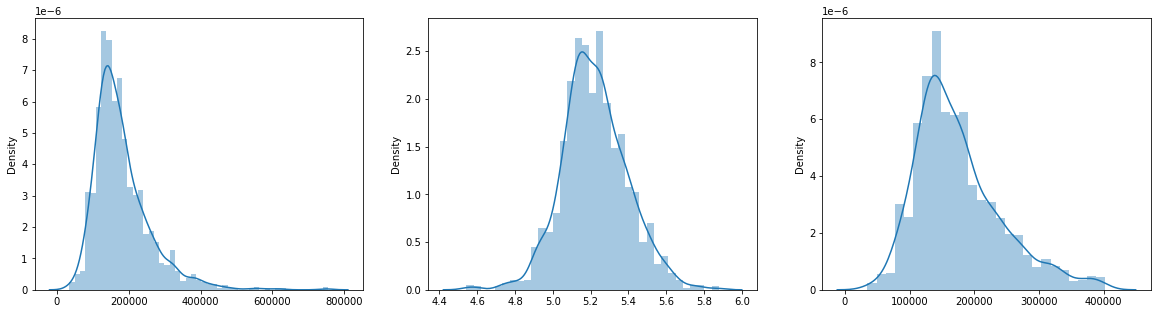

In [30]:
sp_arr = []
fig, (sp_arr) = plt.subplots(1,3,figsize=(20,5))
sns.distplot(x=df_train['SalePrice'], ax=sp_arr[0])
sns.distplot(x=np.log10(df_train['SalePrice']), ax=sp_arr[1])
sns.distplot(x=filtered['SalePrice'], ax=sp_arr[2])
plt.show()

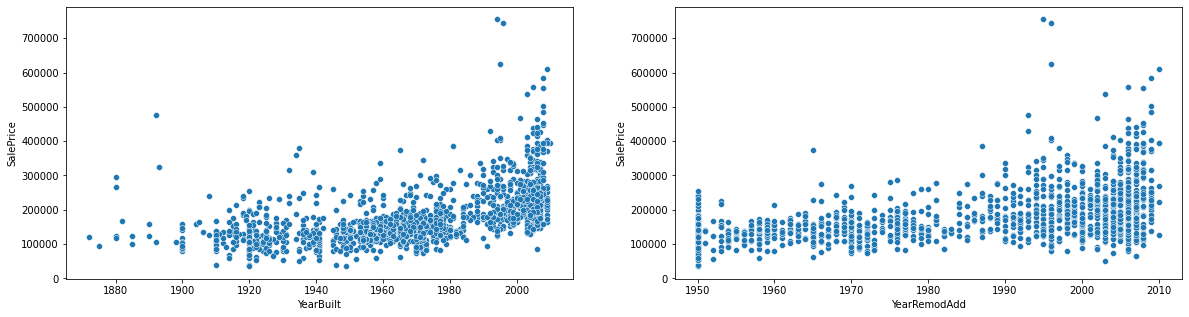

In [31]:
time_col=['YearBuilt','YearRemodAdd']
tc_arr=[]
fig,(tc_arr)=plt.subplots(1,2,figsize=(20,5))
count=0
for i in time_col:
    sns.scatterplot(x=df_train[i],y=df_train['SalePrice'],ax=tc_arr[count])
    count=count+1
plt.show()

# correlation

## correlation with all non category

In [32]:
def get_corr(df):
	corr_matrix = df.iloc[:,1:].corr()
	corr_columns=list()
	for row in corr_matrix["SalePrice"].index:
		if ( corr_matrix.loc[row,"SalePrice"] > 0.1 ) :
			corr_columns.append(row)
	return corr_columns

In [33]:
correlation = get_corr(df_train)
str(correlation)

"['TotRmsAbvGrd', 'OpenPorchSF', 'BsmtFullBath', 'GarageArea', '2ndFlrSF', 'WoodDeckSF', '1stFlrSF', 'HalfBath', 'BsmtFinSF1', 'MasVnrArea', 'LotArea', 'TotalBsmtSF', 'ScreenPorch', 'YearBuilt', 'BsmtUnfSF', 'FullBath', 'Fireplaces', 'BedroomAbvGr', 'YearRemodAdd', 'GrLivArea', 'OverallQual', 'SalePrice']"

In [34]:
len(correlation)

22

## correlation with category

In [35]:
df_train['type'] = 'train'
df_test['type'] = 'test'

In [36]:
new_df = pd.concat([df_train,df_test])

In [37]:
new_df_cat = pd.get_dummies(new_df)

In [38]:
df_train = new_df_cat[new_df_cat['type_train'] == 1]
df_test = new_df_cat[new_df_cat['type_test'] == 1]

In [39]:
del df_train['type_train']
del df_train['type_test']
del df_test['type_train']
del df_test['type_test']

In [40]:
correlation2 = df_train.corr()

In [41]:
dict_corr2 = correlation2.to_dict()

In [42]:
selected_list = []
for i in dict_corr2:
    if ( correlation2.loc[i,'SalePrice'] > 0.1): 
        selected_list.append(i)